In [2]:
from google.colab import drive

In [3]:
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
import yfinance as yf
from datetime import datetime

start = datetime(2023, 6, 7, 9, 30, 0)
end = datetime(2023, 6, 7, 13, 35, 0)
twii = yf.download(tickers="^TWII", interval="1m", start=start, end=end)



# twii = downloader

[*********************100%***********************]  1 of 1 completed


In [6]:
twii.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-07 13:25:00+08:00,16898.689453,16898.990234,16898.689453,16898.990234,16898.990234,0
2023-06-07 13:26:00+08:00,16898.990234,16898.990234,16898.990234,16898.990234,16898.990234,0
2023-06-07 13:27:00+08:00,16898.990234,16898.990234,16898.990234,16898.990234,16898.990234,0
2023-06-07 13:28:00+08:00,16898.990234,16898.990234,16898.990234,16898.990234,16898.990234,0
2023-06-07 13:29:00+08:00,16898.990234,16898.990234,16898.990234,16898.990234,16898.990234,0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


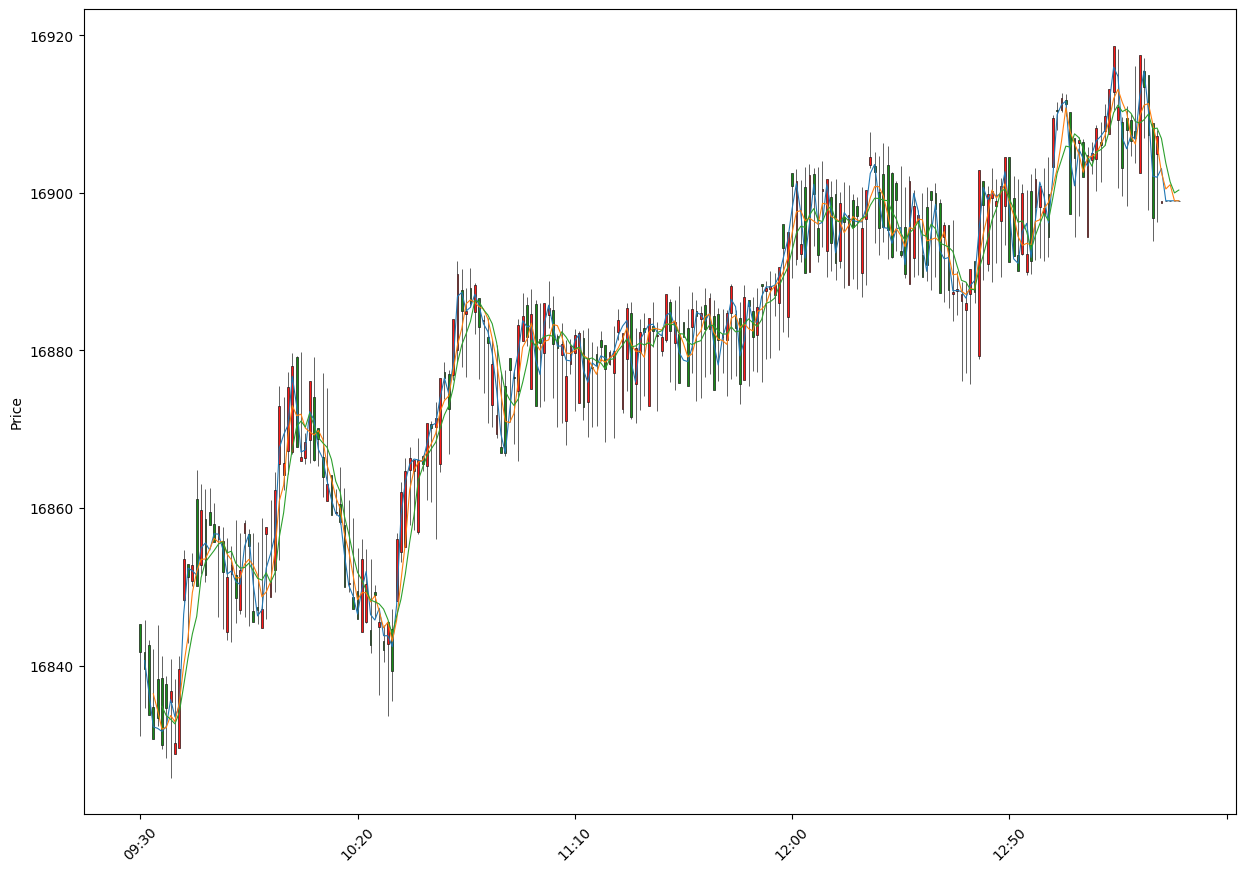

In [14]:
!pip install mplfinance
import matplotlib.pyplot as plt
import mplfinance as mpf

mc = mpf.make_marketcolors(up="r", down="g")
style = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(twii, type="candle", style=style, mav=(2, 4, 6), figscale=2)
plt.show()

In [ ]:
len(pushes0607[pushes0607["stock_target"] == "Market"])

220

In [ ]:
pushes0607.stock_target.value_counts().describe()

count    497.000000
mean       2.422535
std       11.839762
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      220.000000
Name: stock_target, dtype: float64

In [ ]:
pushes0607.sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [7]:
pushes0607 = pd.read_csv("0607pushes_sentiment.csv")

dict1 = {'neutral': 0, 'positive': 1, 'negative': -1}
pushes0607["sentiment_score"] = pushes0607["sentiment"].replace(dict1)

In [8]:
pushes0607['time'] = '2023/' + pushes0607['time']

In [9]:
pushes0607['time'] = pd.to_datetime(pushes0607['time'], format='%Y/%m/%d %H:%M')

In [10]:
sentiment_result = pushes0607.groupby(pd.Grouper(key="time", freq="1T"))["sentiment_score"].mean()

<Axes: xlabel='time'>

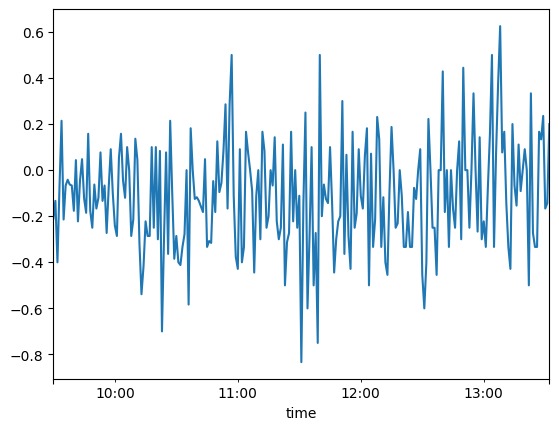

In [27]:
sentiment_result.plot()

In [15]:
import plotly.express as px

In [32]:
px.line(sentiment_result)

In [72]:
sentiment_result.index

DatetimeIndex(['2023-06-07 09:30:00', '2023-06-07 09:31:00',
               '2023-06-07 09:32:00', '2023-06-07 09:33:00',
               '2023-06-07 09:34:00', '2023-06-07 09:35:00',
               '2023-06-07 09:36:00', '2023-06-07 09:37:00',
               '2023-06-07 09:38:00', '2023-06-07 09:39:00',
               ...
               '2023-06-07 13:23:00', '2023-06-07 13:24:00',
               '2023-06-07 13:25:00', '2023-06-07 13:26:00',
               '2023-06-07 13:27:00', '2023-06-07 13:28:00',
               '2023-06-07 13:29:00', '2023-06-07 13:30:00',
               '2023-06-07 13:31:00', '2023-06-07 13:32:00'],
              dtype='datetime64[ns]', name='time', length=243, freq='T')

In [11]:
twii.index = twii.index.tz_localize(None)

In [12]:
twii["Close_1m_diff"] = twii.Close - twii.Close.shift(1)

In [13]:
twii.Close_1m_diff

Datetime
2023-06-07 09:30:00         NaN
2023-06-07 09:31:00   -2.220703
2023-06-07 09:32:00   -5.808594
2023-06-07 09:33:00   -2.980469
2023-06-07 09:34:00    2.599609
                         ...   
2023-06-07 13:25:00   -8.169922
2023-06-07 13:26:00    0.000000
2023-06-07 13:27:00    0.000000
2023-06-07 13:28:00    0.000000
2023-06-07 13:29:00    0.000000
Name: Close_1m_diff, Length: 240, dtype: float64

In [21]:
px.line(y=[sentiment_result[:-3], twii.Close_1m_diff])

In [22]:
import plotly.graph_objs as go
import plotly.offline as pyo

trace1 = go.Scatter(y=sentiment_result[:-3], name="sentiment", mode="lines")
trace2 = go.Scatter(y=twii.Close_1m_diff, name="TWII")
figure = go.Figure(data=[trace1, trace2])
figure.show()

In [23]:
s_mean = sentiment_result[:-3].mean()
s_std = sentiment_result[:-3].std()
sentiment_nor = (sentiment_result[:-3] - s_mean) / s_std

twii_mean = twii.Close_1m_diff.mean()
twii_std = twii.Close_1m_diff.std()
twii_nor = (twii.Close_1m_diff - twii_mean) / twii_std

In [24]:
import plotly.graph_objs as go
import plotly.offline as pyo

trace1 = go.Scatter(y=sentiment_nor, name="sentiment", mode="lines")
trace2 = go.Scatter(y=twii_nor, name="TWII")
figure = go.Figure(data=[trace1, trace2])
figure.show()

In [29]:
import numpy as np
np.corrcoef(sentiment_nor[1:], twii_nor[1:])

array([[ 1.        , -0.16393794],
       [-0.16393794,  1.        ]])

In [28]:
twii_nor

Datetime
2023-06-07 09:30:00         NaN
2023-06-07 09:31:00   -0.433566
2023-06-07 09:32:00   -1.065877
2023-06-07 09:33:00   -0.567463
2023-06-07 09:34:00    0.415941
                         ...   
2023-06-07 13:25:00   -1.482025
2023-06-07 13:26:00   -0.042201
2023-06-07 13:27:00   -0.042201
2023-06-07 13:28:00   -0.042201
2023-06-07 13:29:00   -0.042201
Name: Close_1m_diff, Length: 240, dtype: float64